# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd # импортируем библиотеку pandas
import matplotlib.pyplot as plt # импортируем библиотеку matplotlib

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv') # скачиваем данные из csv-файла в датафрейм

In [3]:
data.head(10) # выводим первые 10 строчек датафрейма

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Данные склеились. Можно заметить, что между каждым пунктом датафрейма в качестве разделителя выступает **\t** — это можно без проблем исправить.

In [4]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') # прочитаем файл, указав разделитель

In [5]:
pd.set_option('display.max_columns', None) # отобразим все столбцы
data.head() # выведем первые пять строк датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
data.info() # получим основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Вывод**

Некорректное наименование столбцов:
- cityCenters_nearest (верблюжий регистр)
- parks_around3000 (поставить знак _ перед 3000)
- ponds_around3000 (поставить знак _ перед 3000)

Содержатся пропуски в столбцах:
- ceiling_height
- floors_total
- living_area
- is_apartment
- kitchen_area
- balcony
- locality_name
- airports_nearest
- cityCenters_nearest
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest
- days_exposition

Неправильный тип данных в столбцах:
- first_day_exposition (верный — datetime)
- floors_total (int)
- is_apartment (bool)
- parks_around3000 (int)
- ponds_around3000 (int)
- days_exposition (int)


### Предобработка данных

Наименование столбца **cityCenters_nearest** имеет частично верблюжий регистр. Исправим его на змеиный.

Также добавим нижнее подчёркивание в столбцы **parks_around3000** и **ponds_around3000** перед 3000.

In [7]:
data = data.rename(columns = {'cityCenters_nearest':'city_centers_nearest',
                       'parks_around3000':'parks_around_3000',
                       'ponds_around3000':'ponds_around_3000'})

Посмотрим, сколько пропусков в каждом из столбцов.

In [8]:
data.isna().sum() # выведем количество пропущенных значений для каждого столбца.

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

По порядку пройдёмся по каждому столбцу с пропусками и заполним их. 
Начнём с **ceiling_height** (высота полотков в метрах). Изучим уникальные значения

In [9]:
sorted(data['ceiling_height'].unique())

[1.0,
 2.0,
 2.3,
 2.4,
 2.45,
 2.46,
 2.48,
 2.53,
 2.59,
 2.62,
 2.63,
 2.7,
 nan,
 1.2,
 1.75,
 2.2,
 2.25,
 2.34,
 2.47,
 2.49,
 2.5,
 2.51,
 2.52,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.6,
 2.61,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,


Согласно документу СНиП 31-01-2003 минимальная высота потолка составляет 2,5 метра, соответственно строки со значением меньше 2,5 в данном столбце удаляем, так как это аномальные значения.

Бросаются в глаза квартиры с высотой потолка больше 10 метров. Это аномальные значения, их необходимо удалить. Возможно, значения от 25,0 до 100,0 были написаны с ошибкой (не в нужном месте установлена запятая). Это можно исправить.

Пропуски заполним медианным значением.

In [10]:
data['ceiling_height'] = data['ceiling_height'].replace([25.0, 26.0, 27.0, 27.5, 32.0, 100.0], 
                                                        [2.5, 2.6, 2.7, 2.75, 3.2, 10.0])
# меняем порядок числа в подозрительных значениях

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
# заполняем пропуски медианным значением

data = data.query("ceiling_height >= 2.5" and "ceiling_height < 10.0")
# отфильтруем аномальые значения

На очереди **floors_total**. Количество этажей не зависит ни от одного параметра, плюс строк с пропусками в данном столбце меньше половины процента.

Удаляем строки с пропущенными значениями количества этажей в доме.

Также заменим тип данных на *int*, так как количество этажей всегда целое число.

In [11]:
data = data.dropna(subset = ['floors_total'])
data['floors_total'] = data['floors_total'].astype('int')

Заполним пустые значения в столбце **living_area** основываясь на средней доле жилой площади квартиры по отношению к общей площади. Оставим после запятой два символа.

In [12]:
data['living_area'].fillna((data['living_area'].mean() / data['total_area'].mean() *
                                                 data['total_area']), inplace = True)
data['living_area'] = round(data['living_area'], 2)

Далее **is_apartment**. 

Первым делом заменим тип данных на булевый, так как данное поле подразумевает ответ True или False.

Далее заменим пропуски на False, так как, скорее всего, это поле оставили незаполненным в том случае, если помещение не являлось апартаментами.

In [13]:
data['is_apartment'] = data['is_apartment'].fillna(value=False).astype('bool')

**kitchen_area**.

Заполним значения по аналогии с **living_area**.

In [14]:
data['kitchen_area'].fillna((data['kitchen_area'].mean() / data['total_area'].mean() *
                                                 data['total_area']), inplace = True)

**balcony**

Скорее всего, отсутствуют значения в тех случаях, когда квартира без балкона. Заполним пропуски нулями.

In [15]:
data['balcony'] = data['balcony'].fillna(0)

**locality_name**

Можно предположить, что пользователи, заполнившие объявления с пропусками в данном столбце, подумали, что раз они публикуются в Санкт-Петербурге, то можно это поле и не заполнять. Однако мы не можем быть уверены в этом на все 100%, поэтому логичнее будет удалить подобные строки, учитывая, что их незначительное количество. 

In [16]:
data = data.dropna(subset = ['locality_name'])

**parks_around_3000** и **ponds_around_3000**

Предположительно данные поля имеют пустые значения из-за того, что парков в радиусе 3 км нет. 

Заполним пропуски нулями.

Также количество парков и прудов — целочисленное значение. Исправим тим данных на *int*.

In [17]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(0).astype('int')
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0).astype('int')

**days_exposition**

Пропуски в данном столбце можно заменить нулями — объявления, скорее всего, были размещены меньше одних суток, однако это достаточно рискованный вариант. Лучше пометить эти пропуски уникальным значением, чтобы в последствии можно было их разлечить. Заполним пропущенные значения в *days_exposition* с помощью *99999*.

Также поменяем тип данных на *int*, так как количество дней — целочисленное значение.

In [18]:
data['days_exposition'] = data['days_exposition'].fillna(99999).astype('int')

**first_day_exposition**

Изменим тип данных на *datetime*, приведем к привычному формату.

In [19]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Посмотрим, сколько комнат в студии.

In [20]:
pd.pivot_table(data, index = 'rooms', columns = 'studio', values = 'first_day_exposition', aggfunc = 'count')

studio,False,True
rooms,,
0,59.0,135.0
1,7990.0,11.0
2,7895.0,NaN
3,5778.0,NaN
4,1172.0,NaN
5,325.0,NaN
6,104.0,NaN
7,59.0,NaN
8,12.0,NaN


Студию можно считать однокомнатной квартирой. Установим для столбца *studio* при значении *True* количество комнат 1.

In [21]:
data.loc[data['studio'] == True, 'rooms'] = 1

Больше 10 комнат в квартире иметь очень даже здорово, но слабо верится в то, что такие квартиры существуют. 

Совершенно противоположные эмоции вызывают квартиры с 0 комнат.

Отфильтруем строки по количеству комнат указав диапазон от 1 до 10.

In [22]:
data = data.query("rooms > 0" and "rooms <= 10.0")

Разберёмся с названиями населённых пунктов.

Выведем уникальные значения.

In [23]:
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

По перечню населенных пунктов видно, что есть неявные дубликаты. Избавимся от них.

In [24]:
data['locality_name'] = data['locality_name'].replace(['Кудрово', 'Любань', 'посёлок Мурино', 
                                                       'посёлок городского типа Рощино', 
                                                       'городской посёлок Рощино', 'поселок городского типа Большая Ижора', 
                                                      'городской посёлок Янино-1', 'городской посёлок Лесогорский', 
                                                      'городской посёлок Мга', 'городской посёлок Назия', 
                                                       'городской посёлок Павлово', 'городской посёлок Советский', 
                                                      'деревня Фёдоровское', 'поселок Гарболово', 
                                                       'коттеджный посёлок Лесное', 'посёлок Аннино', 'посёлок Бугры', 
                                                      'посёлок Возрождение', 'посёлок Гаврилово', 'посёлок Жилгородок', 
                                                      'посёлок Ильичёво', 'посёлок Кобралово', 'посёлок Коробицыно', 
                                                      'посёлок Лисий Нос', 'посёлок Мельниково', 'посёлок Мичуринское', 
                                                      'посёлок Новый Свет', 'посёлок Пансионат Зелёный Бор', 'посёлок Перово', 
                                                       'посёлок Петровское', 'посёлок Победа', 'посёлок Поляны', 
                                                       'посёлок городского типа Рябово', 'посёлок Старая Малукса', 
                                                       'посёлок Стеклянный', 'посёлок Сумино', 'посёлок Тельмана', 
                                                       'посёлок Терволово', 'посёлок Усть-Луга', 
                                                       'посёлок городского типа Вырица', 'посёлок городского типа Красный Бор', 
                                                       'посёлок городского типа Кузьмоловский', 
                                                       'посёлок городского типа Лебяжье', 'посёлок городского типа Токсово', 
                                                       'посёлок городского типа Форносово', 
                                                       'посёлок городского типа имени Свердлова', 'поселок станции Вещево', 
                                                       'поселок станции Приветнинское', 'посёлок станции Громово'], 
                                                      ['деревня Кудрово', 'поселок Любань', 'поселок Мурино', 
                                                       'поселок городского типа Рощино', 'поселок городского типа Рощино', 
                                                      'городской поселок Большая Ижора', 'городской поселок Янино-1', 
                                                       'поселок городского типа Лесогорский', 'посёлок городского типа Мга', 
                                                      'поселок городского типа Назия', 'посёлок городского типа Павлово', 
                                                      'поселок городского типа Советский', 'городской посёлок Фёдоровское', 
                                                      'деревня Гарболово', 'поселок Лесное', 'поселок Аннино', 'поселок Бугры', 
                                                      'поселок Возрождение', 'поселок Гаврилово', 'поселок Жилгородок', 
                                                      'поселок Ильичёво', 'поселок Кобралово', 'поселок Коробицыно', 
                                                      'поселок Лисий Нос', 'поселок Мельниково', 'поселок Мичуринское', 
                                                      'поселок Новый Свет', 'поселок Пансионат Зелёный Бор', 'поселок Перово', 
                                                       'поселок Петровское', 'поселок Победа', 'поселок Поляны', 
                                                       'поселок городского типа Рябово', 'поселок Старая Малукса', 
                                                       'поселок Стеклянный', 'поселок Сумино', 'поселок Тельмана', 
                                                       'поселок Терволово', 'поселок Усть-Луга', 
                                                       'поселок городского типа Вырица', 'поселок городского типа Красный Бор', 
                                                       'поселок городского типа Кузьмоловский', 
                                                       'поселок городского типа Лебяжье', 'поселок городского типа Токсово', 
                                                       'поселок городского типа Форносово', 
                                                       'поселок городского типа имени Свердлова', 
                                                       'посёлок при железнодорожной станции Вещево', 
                                                       'посёлок при железнодорожной станции Приветнинское', 
                                                       'поселок Громово'])

Посмотрим уникальные значения в столбце **floors_total**.

In [25]:
sorted(data['floors_total'].unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 33,
 34,
 35,
 36,
 37,
 52,
 60]

Максимальная этажность жилого дома в Ленинградской области — 37 (*ЖК «Князь Александр Невский»*), поэтому строки со значением больше этого необходимо удалить.

In [26]:
data = data.query("floors_total <= 37")

Выведем уникальные значения в столбце **last_price**.

In [27]:
sorted(data['last_price'].unique())

[12190.0,
 430000.0,
 440000.0,
 450000.0,
 470000.0,
 480000.0,
 490000.0,
 500000.0,
 520000.0,
 530000.0,
 550000.0,
 560000.0,
 565000.0,
 580000.0,
 585000.0,
 590000.0,
 600000.0,
 620000.0,
 630000.0,
 650000.0,
 660000.0,
 680000.0,
 690000.0,
 700000.0,
 710000.0,
 720000.0,
 730000.0,
 740000.0,
 750000.0,
 760000.0,
 770000.0,
 777000.0,
 780000.0,
 790000.0,
 799000.0,
 800000.0,
 820000.0,
 850000.0,
 860000.0,
 869000.0,
 870000.0,
 880000.0,
 890000.0,
 900000.0,
 910000.0,
 920000.0,
 945750.0,
 950000.0,
 965780.0,
 970000.0,
 980000.0,
 990000.0,
 995000.0,
 999000.0,
 999999.0,
 1000000.0,
 1010000.0,
 1020000.0,
 1030000.0,
 1050000.0,
 1060000.0,
 1070000.0,
 1080000.0,
 1090000.0,
 1099000.0,
 1100000.0,
 1110000.0,
 1130000.0,
 1150000.0,
 1170000.0,
 1180000.0,
 1190000.0,
 1199000.0,
 1200000.0,
 1220000.0,
 1230000.0,
 1240000.0,
 1249000.0,
 1250000.0,
 1260000.0,
 1270000.0,
 1280000.0,
 1290000.0,
 1300000.0,
 1310000.0,
 1315000.0,
 1320000.0,
 1330000.0,


Значение 12190.0 выделяется из общего списка. Было бы неплохо приобрести недвижимость за такую стоимость, однако.. 

Удалим его.

In [28]:
data = data.query("last_price >= 430000.0")

Выведем на экран количество пропущенных значений в столбцах после предобработки.

In [29]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000           0
parks_nearest           15529
ponds_around_3000           0
ponds_nearest           14521
days_exposition             0
dtype: int64

Часть столбцов имеет пропуски, однако пока неясно, какими значениями их заполнять. Вернёмся к ним позже.

**Вывод**

На этапе предобработки было выполнено следующее:
- заменены названия столбцов *cityCenters_nearest*, *parks_around3000* и *ponds_around3000*;
- в *ceiling_height* пропуски заполнены медианным значением, аномальные значения либо удалены, либо обработаны;
- строки с пропущенными значениями в *floors_total* удалены;
- пропуски в *living_area* и в *kitchen_area* заполнены на основе средней доле жилой площади и площади кухни по отношению к общей площади квартиры соответственно;
- в *is_apartment* изменен тип данных на булевый, строки с пропусками заполнены False;
- значения NaN в *balcony* заполнены нулями;
- строки с пропусками в *locality_name* удалены;
- пропуски в *parks_around_3000* и *ponds_around_3000* заменены нулями, тип данных изменен на целочисленный;
- тип данных столбца *days_exposition* изменен на int, пропуски заполнены идентификатором 99999;
- изменен тип данных на *datetime* и формат в столбце *first_day_exposition*;
- указан корректный показатель количества комнат в студиях;
- удалены строки с аномальным количеством комнат в квартирах;
- устранены неявные дубликаты в названиях населённых пунктов;
- устранено аномальное значение в столбце со стоимостью.

Часть данных осталась с пропусками из-за того, что пока не было выявлено явных причин, на основе которых можно было бы заполнить пропуски.

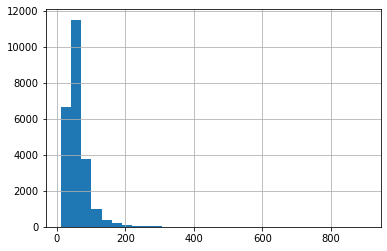

In [30]:
#код ревьюера
data2 = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
(data2['total_area']).hist(bins=30);

<AxesSubplot:>

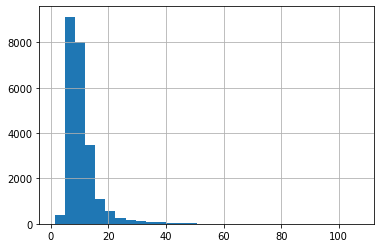

In [31]:
data['kitchen_area'].hist(bins=30) # выведем гистограмму площади кухни

<AxesSubplot:>

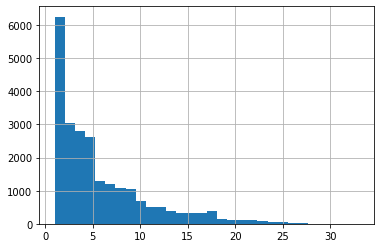

In [32]:
data['floor'].hist(bins=30) # выведем гистограмму количества этажей

<AxesSubplot:>

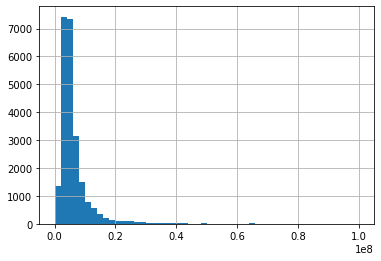

In [33]:
data['last_price'].hist(bins=50, range = (0, 100000000)) # выведем гистограмму цены

<AxesSubplot:>

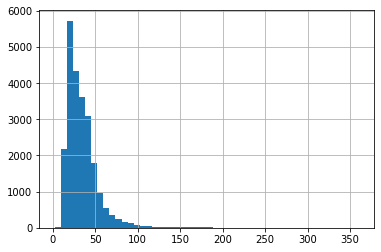

In [34]:
data['living_area'].hist(bins=50) # выведем гистограмму жилой площади

<AxesSubplot:>

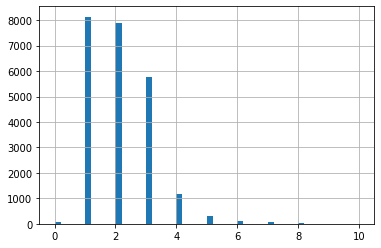

In [35]:
data['rooms'].hist(bins=50) # выведем гистограмму жилой площади

На основе гистограмм удалим строки, в которых:
- общая площадь больше 200 кв. м.;
- площадь кухни больше 40 кв. м.;
- количество этажей больше 25;
- цена больше 30 млн. руб.;
- жилая площадь больше 120 кв. м.;
- количество комнат больше 7;

In [36]:
# разобьем вывод срезов на два этапа, так как строка с кодом получается длинной, перенести ее нельзя
data = data.query("total_area <= 200 and kitchen_area <= 40 and floor <= 25")

data = data.query("last_price <= 30000000 and living_area <= 120 and rooms <= 7")

### Посчитайте и добавьте в таблицу новые столбцы

Добавим в таблицу новые столбцы:
- цена одного квадратного метра;
- день публикации объявления (0 - понедельник, 1 - вторник и т.д.):
- месяц публикации объявления:
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»):
- расстояние в км до центра города.

In [37]:
data['price_per_sm'] = (data['last_price'] / data['total_area']).astype('int')
# добавим столбец с ценой за один квадратный метр, приветем к целочисленному типу

data['weekday_of_publication'] = data['first_day_exposition'].dt.weekday
# добавим столбец с днём недели публикации объявления

data['month_of_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month
# добавим столбец с месяцем публикации объявления

data['year_of_publication'] = pd.DatetimeIndex(data['first_day_exposition']).year
# добавим столбец с годом публикации объявления

data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'последний'
data.loc[data['floor_type'].isna(), 'floor_type'] = 'другой'
# добавим столбец с типом этажа квартиры

data['city_сenters_nearest_km'] = (data['city_centers_nearest'] / 1000).fillna(99999).astype(int)
# добавим столбец с расстоянием в км до центра города. Заполним пропуски с помощью 99999, переведем тип данных в int

Выведем на экран первые 5 строк измененной таблицы.

In [38]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_sm,weekday_of_publication,month_of_publication,year_of_publication,floor_type,city_сenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,99999,120370,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920,1,12,2018,первый,18
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785,3,8,2015,другой,13
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0.0,городской поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55,95065,0,9,2018,другой,99999
6,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.6,6,False,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155,99195,3,11,2017,другой,19


**Вывод**

Рассчитали и добавили столбцы:
- цена за квадратный метр;
- день недели публикации объявления;
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры;
- расстояние в км до центра города.

### Проведите исследовательский анализ данных

Первым делом изучим каждый из показателей. Изучим общую информацию о каждом и построим гистограммы для наглядности.

<AxesSubplot:title={'center':'Зависимость количества объявлений от месяца публикации объявления'}, ylabel='Frequency'>

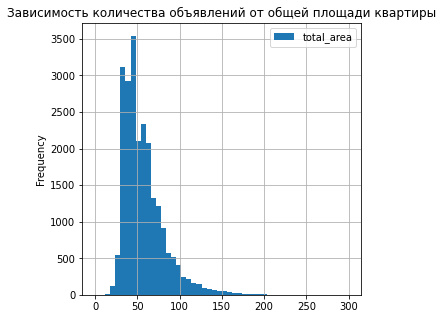

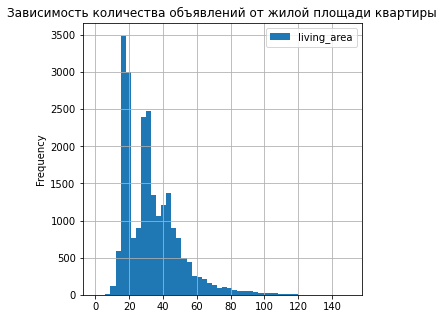

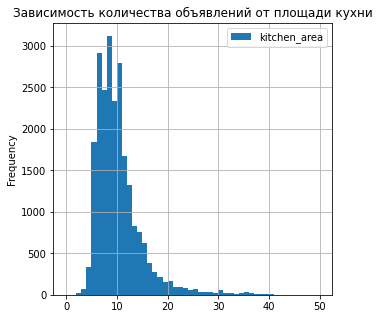

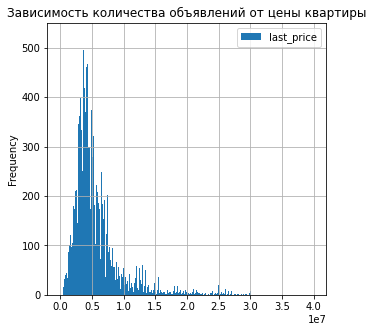

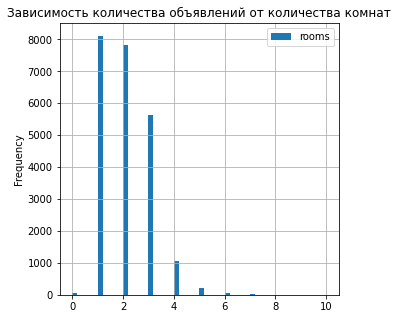

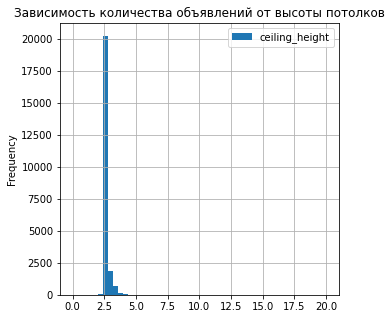

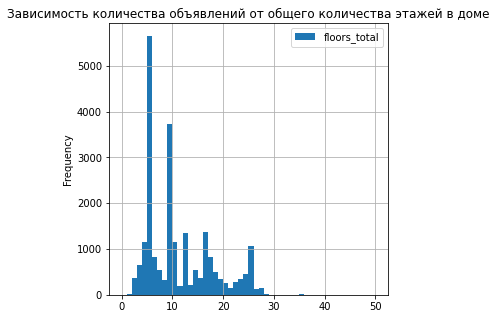

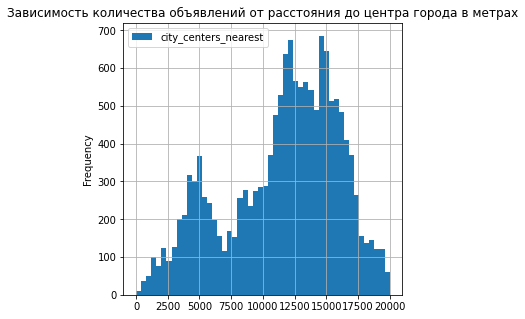

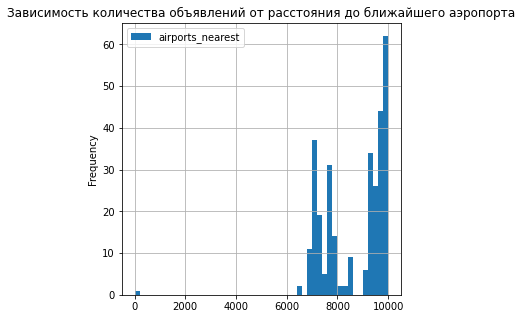

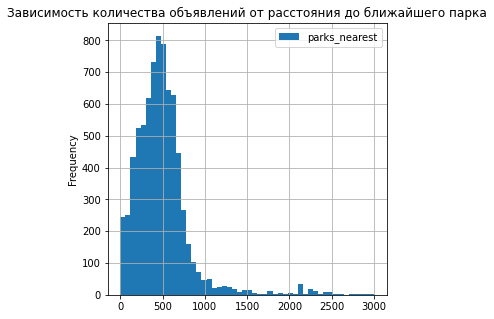

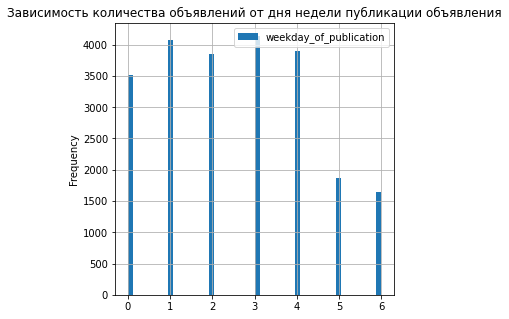

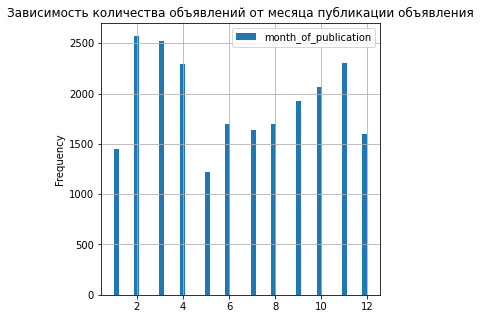

In [39]:
data.plot(y = 'total_area', title = 'Зависимость количества объявлений от общей площади квартиры', 
          kind = 'hist', bins = 50, grid=True, figsize = (5,5), range = (0,300))

data.plot(y = 'living_area', title = 'Зависимость количества объявлений от жилой площади квартиры', 
          kind = 'hist', bins = 50, grid=True, figsize = (5,5), range = (0,150))

data.plot(y = 'kitchen_area', title = 'Зависимость количества объявлений от площади кухни', 
          kind = 'hist', bins = 50, grid=True, figsize = (5,5), range = (0,50))

data.plot(y = 'last_price', title = 'Зависимость количества объявлений от цены квартиры', 
          kind = 'hist', bins = 500, grid=True, figsize = (5,5), range = (0,40000000))

data.plot(y = 'rooms', title = 'Зависимость количества объявлений от количества комнат', 
          kind = 'hist', bins = 50, grid=True, figsize = (5,5), range = (0,10))

data.plot(y = 'ceiling_height', title = 'Зависимость количества объявлений от высоты потолков', 
          kind = 'hist', bins = 50, grid=True, figsize = (5,5), range = (0,20))

data.plot(y = 'floors_total', title = 'Зависимость количества объявлений от общего количества этажей в доме', 
          kind = 'hist', bins = 50, grid=True, figsize = (5,5), range = (0,50))

data.plot(y = 'city_centers_nearest', title = 'Зависимость количества объявлений от расстояния до центра города в метрах', 
          kind = 'hist', bins = 50, grid=True, figsize = (5,5), range = (0,20000))

data.plot(y = 'airports_nearest', title = 'Зависимость количества объявлений от расстояния до ближайшего аэропорта', 
          kind = 'hist', bins = 50, grid=True, figsize = (5,5), range = (0,10000))

data.plot(y = 'parks_nearest', title = 'Зависимость количества объявлений от расстояния до ближайшего парка', 
          kind = 'hist', bins = 50, grid=True, figsize = (5,5), range = (0,3000))

data.plot(y = 'weekday_of_publication', title = 'Зависимость количества объявлений от дня недели публикации объявления', 
          kind = 'hist', bins = 50, grid=True, figsize = (5,5), range = (0,6))

data.plot(y = 'month_of_publication', title = 'Зависимость количества объявлений от месяца публикации объявления', 
          kind = 'hist', bins = 50, grid=True, figsize = (5,5), range = (1,12))

По гистограмме трудно разобраться с данными по стоимости квартиры в рублях. Переведем значения в млн. руб., добавим столбец.

In [40]:
data['last_price_mil'] = round((data['last_price'] / 1000000), 2)

Построим отдельную гистограмму для данного показателя.

<AxesSubplot:title={'center':'Зависимость количества объявлений от цены квартиры'}, ylabel='Frequency'>

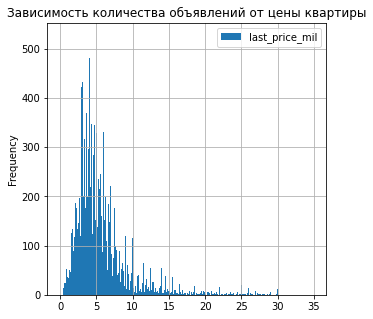

In [41]:
data.plot(y = 'last_price_mil', title = 'Зависимость количества объявлений от цены квартиры', 
          kind = 'hist', bins = 500, grid=True, figsize = (5,5), range = (0,35))

In [42]:
data[['total_area', 'living_area', 'kitchen_area', 'last_price', 'last_price_mil', 'rooms', 
     'ceiling_height', 'floor', 'floors_total', 'city_centers_nearest', 
     'airports_nearest', 'parks_nearest', 'weekday_of_publication', 'month_of_publication']].describe()

,total_area,living_area,kitchen_area,last_price,last_price_mil,rooms,ceiling_height,floor,floors_total,city_centers_nearest,airports_nearest,parks_nearest,weekday_of_publication,month_of_publication
count,22994.000000,22994.000000,22994.000000,2.299400e+04,22994.000000,22994.000000,22994.000000,22994.000000,22994.000000,17518.000000,17498.000000,7670.000000,22994.000000,22994.000000
mean,57.050014,32.707953,10.031808,5.616046e+06,5.616093,2.020875,2.689283,5.857050,10.711316,14401.632492,28825.282375,493.880183,2.565756,6.402148
std,24.525550,16.139796,4.544730,3.807010e+06,3.807011,0.962842,0.216435,4.817394,6.569236,8589.789635,12739.094734,341.556329,1.789893,3.493657
min,12.000000,2.000000,1.300000,4.300000e+05,0.430000,0.000000,1.000000,1.000000,1.000000,208.000000,0.000000,1.000000,0.000000,1.000000
25%,40.000000,18.900000,7.000000,3.400000e+06,3.400000,1.000000,2.600000,2.000000,5.000000,9651.250000,18428.000000,290.000000,1.000000,3.000000
50%,51.000000,30.000000,9.000000,4.590000e+06,4.590000,2.000000,2.650000,4.000000,9.000000,13222.000000,26847.000000,456.000000,3.000000,6.000000
75%,67.800000,41.500000,11.550000,6.547499e+06,6.547500,3.000000,2.700000,8.000000,16.000000,16381.000000,37412.000000,614.000000,4.000000,10.000000
max,200.000000,120.000000,40.000000,3.000000e+07,30.000000,7.000000,8.300000,25.000000,37.000000,65968.000000,84869.000000,3190.000000,6.000000,12.000000


Отдельно рассмотрим связку ключевых показателей с типом этажа квартиры.

In [43]:
data.pivot_table(index = 'floor_type', values = ['total_area','living_area', 'kitchen_area', 
                                                 'last_price', 'rooms', 'ceiling_height'], aggfunc = 'median')

,ceiling_height,kitchen_area,last_price,living_area,rooms,total_area
floor_type,,,,,,
другой,2.65,9.451891,4782500.0,29.93,2,51.0
первый,2.65,8.000000,3900000.0,30.00,2,50.4
последний,2.65,8.400000,4200000.0,31.00,2,52.0


Изучим коэффициент корреляции для всех параметров.

In [44]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_sm,weekday_of_publication,month_of_publication,year_of_publication,city_сenters_nearest_km,last_price_mil
total_images,1.000000,0.159009,0.117480,0.094615,0.034178,0.013509,0.103610,0.034590,0.015729,-0.028023,-0.025005,0.099274,0.048366,-0.001583,-0.041759,0.028790,-0.002773,0.002001,0.005000,0.109590,0.138292,-0.008150,0.003817,0.145381,-0.054140,0.159011
last_price,0.159009,1.000000,0.778777,0.488207,0.382443,0.093983,0.674776,0.089475,0.021628,-0.053381,-0.035795,0.610680,0.039559,-0.033889,-0.345494,0.283465,0.047538,0.299094,-0.104647,0.130107,0.681258,-0.021253,0.006982,-0.027772,-0.376532,1.000000
total_area,0.117480,0.778777,1.000000,0.792367,0.333478,-0.040332,0.929767,-0.018573,0.020756,-0.095312,-0.058091,0.593967,0.037944,-0.022027,-0.215654,0.168398,0.009330,0.180521,-0.069775,0.114807,0.144239,-0.016882,0.011124,-0.074854,-0.158639,0.778777
rooms,0.094615,0.488207,0.792367,1.000000,0.172151,-0.218948,0.871856,-0.156712,0.000130,-0.084758,-0.098027,0.236852,-0.002942,-0.055187,-0.149180,0.118818,-0.041363,0.089788,-0.034408,0.105694,-0.073252,-0.005692,-0.001772,-0.042859,-0.099313,0.488206
ceiling_height,0.034178,0.382443,0.333478,0.172151,1.000000,-0.064166,0.297565,-0.038273,0.058401,0.014786,-0.003486,0.283644,-0.044269,-0.076921,-0.266487,0.211029,-0.048032,0.193087,-0.094775,0.056012,0.260933,-0.018915,-0.003488,-0.042940,-0.119972,0.382445
floors_total,0.013509,0.093983,-0.040332,-0.218948,-0.064166,1.000000,-0.155765,0.672863,-0.023703,0.070941,0.049947,0.210435,0.173752,0.103283,-0.000505,-0.149648,0.094586,-0.042855,0.039015,-0.069903,0.256024,0.011513,0.015669,0.002676,-0.145138,0.093987
living_area,0.103610,0.674776,0.929767,0.871856,0.297565,-0.155765,1.000000,-0.103339,0.018545,-0.068933,-0.040330,0.371879,0.007467,-0.047273,-0.204282,0.172056,-0.027668,0.154430,-0.052705,0.116444,0.057022,-0.011482,0.004474,-0.064372,-0.139385,0.674775
floor,0.034590,0.089475,-0.018573,-0.156712,-0.038273,0.672863,-0.103339,1.000000,-0.013108,0.037151,0.034811,0.152951,0.171113,0.066762,-0.001319,-0.099807,0.071019,-0.029379,0.032841,-0.050177,0.199287,0.008653,0.018551,0.003390,-0.094659,0.089477
is_apartment,0.015729,0.021628,0.020756,0.000130,0.058401,-0.023703,0.018545,-0.013108,1.000000,-0.003420,-0.002260,0.031292,0.030847,0.019967,0.015645,0.008403,-0.020807,0.015336,0.004524,0.013434,0.018553,-0.008969,-0.004924,0.021806,-0.007176,0.021629
studio,-0.028023,-0.053381,-0.095312,-0.084758,0.014786,0.070941,-0.068933,0.037151,-0.003420,1.000000,-0.004223,-0.090822,0.030384,-0.022019,-0.008748,-0.031482,0.006590,-0.007777,0.000380,-0.008592,0.029213,-0.000795,-0.000739,0.010447,0.026003,-0.053381


**Вывод**

Большая часть квартир имеет площадь около 50 кв. метров. Объявлений квартир с общей площадью более 100 кв. метров менее 500.

Наибольшее количество квартир имеет жилую площадь менее 20 кв. метров. Также немалую долю занимают квартиры с жилой площадью около 30 кв. метров. Прослеживается зависимость с количеством комнат (больше всего квартир с 1 и 2 комнатами).

В среднем площадь кухни составляет чуть больше 10 кв. метров, но большая часть квартир не достигает такого показателя.

Больше всего квартир имеют стоимость от 2,5 до 4,5 млн. руб, в среднем же цена составляет 6,5 млн. руб.

Высота потолка, в основном, составляет 2,7 метра.

Больше всего объявлений о продаже квартир в пятиэтажках. По гистограмме также виден пик напротив девятиэтажных домов.

В среднем до центра города 14 км., до аэропорта почти 29 км. Парки находятся, в основном, в пределах 500 метров.

Квартиры чаще всего публикуют в будние дни. Скорее всего, это связано с желанием большинства людей не думать о данном вопросе на выходных и просто отдыхать.

Наиболее популярные месяцы публикации объявлений о продаже квартир — февраль и март (связано, вероятнее всего, с тем, что люди отходят от праздников, настраиваются на рабочий лад), непопулярные — январь и май (из-за обилия праздников, подготовки к летнему сезону).

Наиболее дешевые квартиры располагаются, в основном, на первом этаже. У этой категории квартир и меньшая площадь кухни. Противоположные значения у квартир, располагающиеся не на первом и не на последнем этажах.

Если принимать тот факт, что при коэффициенте корреляции > 0,5 наблюдается тесная связь между показателями, то ничего интересного, кроме как зависимости цены от различных площадей, не было выявлено.

**4.1. Скорость продажи квартиры**

Изучим, как быстро продавались квартиры. Будем опираться на столбец *days_exposition*.

Построим диаграмму размаха, гистограму, посчитаем среднее и медианное значения.

Начнём с гистограммы.

<AxesSubplot:title={'center':'Скорость продажи квартиры'}, ylabel='Frequency'>

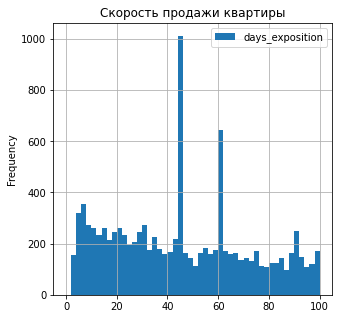

In [45]:
data.plot(y = 'days_exposition', title = 'Скорость продажи квартиры', 
          kind = 'hist', bins = 50, grid=True, figsize = (5,5), range = (0,100))

Построив диаграмму в крупном масштабе видно, что есть аномальные пики в значениях 7, 45, 60 и 90 (https://yandex.ru/support/realty/owner/home/add-ads-housing.html). Это то количество дней, когда заканчивается срок публикации объявления. Уберем данные значения из выборки.

Среднее количество дней для продажи квартиры составляет 191.51992723664628
Медианное количество дней для продажи квартиры составляет 111.0


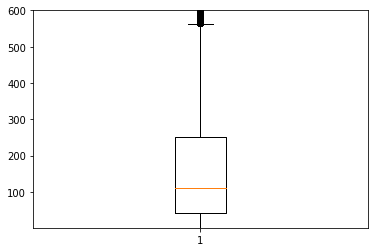

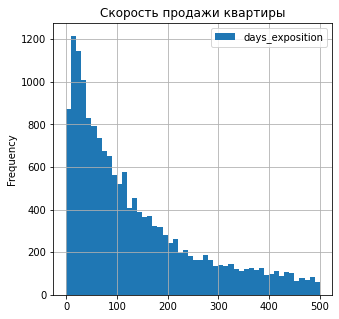

In [46]:
days_exposition_good = data.query(
    'days_exposition != 7 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90 and days_exposition != 99999')

plt.boxplot(days_exposition_good['days_exposition'])
plt.ylim(1,600)

days_exposition_good.plot(y = 'days_exposition', title = 'Скорость продажи квартиры', 
          kind = 'hist', bins = 50, grid=True, figsize = (5,5), range = (0,500))

print('Среднее количество дней для продажи квартиры составляет', 
      days_exposition_good['days_exposition'][days_exposition_good['days_exposition'] != 99999].mean())
print('Медианное количество дней для продажи квартиры составляет', 
      days_exposition_good['days_exposition'][days_exposition_good['days_exposition'] != 99999].median())

**Вывод по пункту 4.1.**

По гистограмме видно, что большая часть квартир продаётся менее чем за 50 дней. Чаще всего квартиры продаются за 3,5 месяца.

Для того, чтобы определить быструю и долгую продажу, будем опираться на диаграмму размаха. Всё, что ниже первого квартиля, то быстрая продажа, что выше — долгая. Получается, что быстрой продажа считается той, что совершилась менее чем за ~ 30 дней, долгая — более чем за 250 дней.

**4.2. Влияние различных факторов на стоимость квартиры**

Изучим, что больше всего влияет на стоимость квартиры.

Ранее мы сделали вывод, что коэффициент корреляции ближе к единице у показателей площади и количества комнат, а также посмотрели зависимость типа этажа. Это значительно сокращает исследование. Также возьмем для изучения даты размещения объявлений.

Для оценки построим гистограммы, в которых будет отношение цены к описанным выше параметрам.

Создадим функции для упрощения дальнейших кодов.

In [47]:
# создадим функцию для рассчёта коэффициента корреляции
def coefcorr(column):
    return data[column].corr(data['last_price_mil'])

# создадим функцию, которая будет создавать сводные таблицы в зависимости от заданного параметра по отношению к 
# медианной стоимости квартиры
def pivot(column):
    return data.pivot_table(index = column, values = 'last_price_mil', aggfunc = 'median')

**Зависимость стоимости квартиры от общей площади**

Коэффициент корреляции между стоимостью квартиры и общей площадью: 0.7787767987258624


<AxesSubplot:title={'center':'Зависимость стоимости от общей площади квартиры'}, xlabel='total_area'>

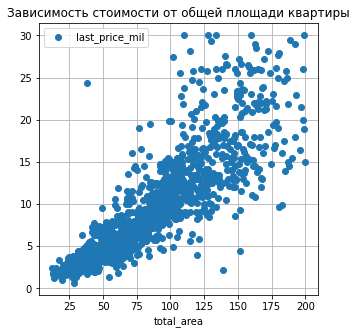

In [48]:
print('Коэффициент корреляции между стоимостью квартиры и общей площадью:', coefcorr('total_area'))

pivot('total_area').plot(title = 'Зависимость стоимости от общей площади квартиры', 
          style = 'o', grid=True, figsize = (5,5))

**Вывод**

Зависимость достаточно сильная. Чем больше общая площадь квартиры, тем больше стоимость.

**Зависимость стоимости квартиры от жилой площади**

Коэффициент корреляции между стоимостью квартиры и жилой площадью: 0.6747749318087287


<AxesSubplot:title={'center':'Зависимость стоимости от жилой площади квартиры='}, xlabel='living_area'>

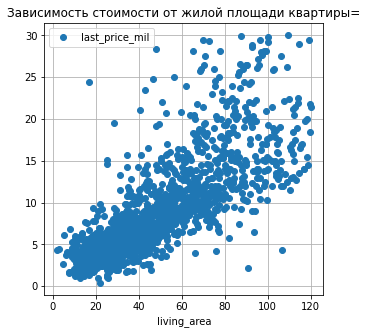

In [49]:
print('Коэффициент корреляции между стоимостью квартиры и жилой площадью:', coefcorr('living_area'))

pivot('living_area').plot(title = 'Зависимость стоимости от жилой площади квартиры=', 
          style = 'o', grid=True, figsize = (5,5))

**Вывод**

История примерно такая же, как и с зависимостью от общей площадью, но связь чуть меньше — зависимость есть.

**Зависимость стоимости квартиры от площади кухни**

Коэффициент корреляции между стоимостью квартиры и площадью кухни: 0.6106792691255951


<AxesSubplot:title={'center':'Зависимость стоимости от площади кухни'}, xlabel='kitchen_area'>

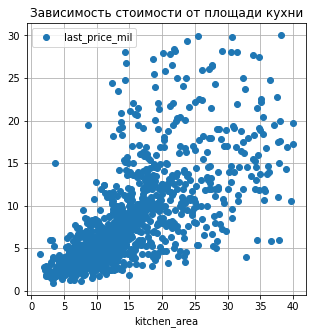

In [50]:
print('Коэффициент корреляции между стоимостью квартиры и площадью кухни:', coefcorr('kitchen_area'))

pivot('kitchen_area').plot(title = 'Зависимость стоимости от площади кухни', 
          style = 'o', grid=True, figsize = (5,5))

**Вывод**

Связь не такая сильная, как в двух предыдущих сравнениях, но зависимость сохраняется.

**Зависимость стоимости квартиры от количества комнат**

Коэффициент корреляции между стоимостью квартиры и количеством комнат: 0.4882061399432085


<AxesSubplot:title={'center':'Зависимость стоимости от количества комнат'}, xlabel='rooms'>

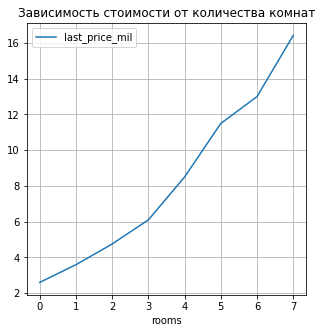

In [51]:
print('Коэффициент корреляции между стоимостью квартиры и количеством комнат:', coefcorr('rooms'))

pivot('rooms').plot(title = 'Зависимость стоимости от количества комнат', grid=True, figsize = (5,5))

**Вывод**

Зависимость ярко выражена. Чем больше комнат, тем дороже стоимость.

**Зависимость стоимости квартиры от типа этажа квартиры**

<AxesSubplot:title={'center':'Зависимость стоимости от типа этажа квартиры'}, xlabel='floor_type'>

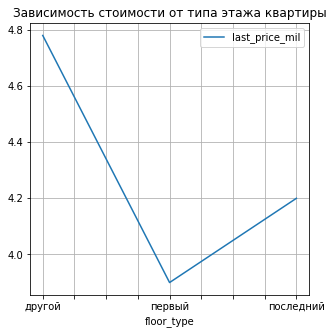

In [52]:
pivot('floor_type').plot(title = 'Зависимость стоимости от типа этажа квартиры', 
                                     grid=True, figsize = (5,5))

**Вывод**

Наименьшая стоимость наблюдается на первом этаже. Это связано с тем, что многие противятся брать квартиру на такой высоте, так как, во-первых, высокий риск проникновения воров, во-вторых, в обычных пятиэтажках (которые, как мы выяснили ранее, преобладают в общей массе объявлений) есть подвал, от которого зачастую исходит неприятный запах, в-третьих, при сильном затоплении соседей сверху вся вода может дойти до первого этажа.

Последний этаж также несильно пользуется спросом, так как многие боятся высоты.

**Зависимость стоимости квартиры от дня недели размещения объявления**

<AxesSubplot:title={'center':'Зависимость стоимости от дня недели размещения объявления'}, xlabel='weekday_of_publication'>

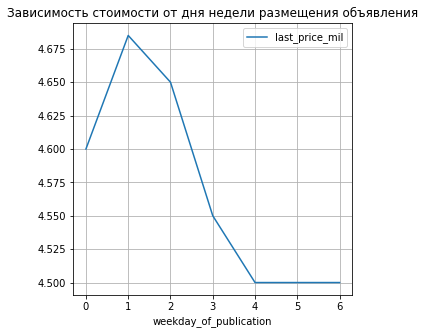

In [53]:
pivot('weekday_of_publication').plot(title = 'Зависимость стоимости от дня недели размещения объявления', 
                                     grid=True, figsize = (5,5))

**Вывод**

Пиковые значения приходятся на вторник и среду. Это можно объяснить тем, что в это время большинство людей наиболее трудоспособны (отошли от выходных и пока не думают о приближающейся пятнице).

**Зависимость стоимости квартиры от месяца размещения объявления**

<AxesSubplot:title={'center':'Зависимость стоимости от месяца размещения объявления'}, xlabel='month_of_publication'>

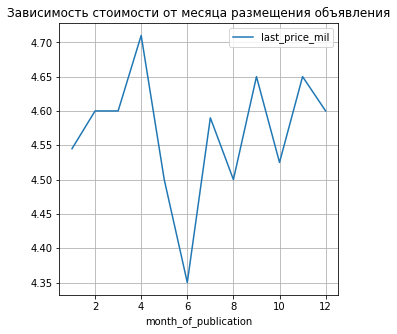

In [54]:
pivot('month_of_publication').plot(title = 'Зависимость стоимости от месяца размещения объявления', 
                                     grid=True, figsize = (5,5))

**Вывод**

Во многих сферах присутствует следующая сезонность по году: сначала наблюдается рост, в апреле достигается пик, май и лето являются провальными, осенью происходит плавный рост, снижающийся к концу года. Всё это связано с периодами отпусков — к апрелю большинство людей отходят от новогодних праздников, летом уходят в отпуск, осенью постепенно входят в ритм.

В данном случае картина отображает вышенаписанное.

**Зависимость стоимости квартиры от года размещения объявления**

<AxesSubplot:title={'center':'Зависимость стоимости от года размещения объявления'}, xlabel='year_of_publication'>

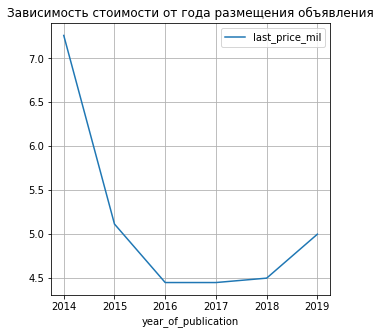

In [55]:
pivot('year_of_publication').plot(title = 'Зависимость стоимости от года размещения объявления', 
                                     grid=True, figsize = (5,5))

**Вывод**

Цена на недвижимость напрямую зависит от курса валют, так как часть материалов закупается заграницей. 

До июля 2014 года мы умнажали доллар на 30, чтобы понять цену в рублях, но затем американская валюта резко поползла вверх, и с середины 2015 года не опускалась ниже 55 рублей.

Это должно было полностью отразиться на графике, однако, как мы видим, медианная цена с 2014 до 2016 падает, далее три года держится на одном уровне, а в 2019 наблюдается рост.

Скорее всего, это связано с кризисом, низкой покупательской способностью, из-за чего застройщики были вынуждены снизить цены на квартиры. С 2019 экономика начала стабилизироваться, вследствие чего наблюдается рост цен на недвижимость.

**Вывод по пункту 4.2.**

На стоимость напрямую влияет площадь любого типа и количество комнат — чем больше значение, тем выше стоимость.

Самые дорогие квартиры находятся на промежуточных этажах, выставляются во вторник или среду в апреле. Дешевейшие эе квартиры располагаются на первом этаже, размещаются в выходные дни в июне.

**4.3. Зависимость стоимости одного квадратного метра в населённых пунктах с наибольшим числом объявлений**

Изучим, как средняя стоимость за один квадратный метр влияет в зависимости от населенного пункта.

In [56]:
# создадим сводную таблицу, в которй будет зависимость средней стоимости одного кв. метра от населенного пункта
locality_name_pivot = data.pivot_table(index = 'locality_name', values = 'price_per_sm', 
                                       aggfunc = ['count','mean', 'median'])
locality_name_pivot.columns = ['count','mean', 'median'] # добавим столбцы со средним и медианным значением
locality_name_pivot.sort_values('count', ascending = False).head(10) 
# отфильтруем по среднему значению и выведем первые 10 населенных пунктов по количеству объявлений

,count,mean,median
locality_name,,,
Санкт-Петербург,15129,110521.482187,104166.0
поселок Мурино,540,85714.440741,86093.0
деревня Кудрово,470,95260.393617,95555.0
посёлок Шушары,438,78576.554795,76876.0
Всеволожск,398,68654.007538,65789.0
Пушкин,360,102901.538889,99865.5
Колпино,337,75332.866469,74722.0
посёлок Парголово,312,90128.923077,91779.5
Гатчина,307,68745.693811,67796.0


По таблице видны населённые пункты с самой высокой стоимостью и с самой низкой стоимостью за квадратный метр жилья.

**Вывод по пункту 4.3.**

Для анализа были взяты топ 10 населенных пунктов, отфильтрованных по количеству объявлений. Это сделано для того, чтобы исключить города / деревни, в которых может быть пара объявлений с большой / низкой стоимостью, что существенно повлияет на результаты анализа.

Самая высокая средняя стоимость за квадратный метр в Ленинградской области принадлежит Санкт-Петербургу (110 тыс. руб.), самая низкая — Выборгу (58 тыс. руб.).

**4.4. Зависимость стоимости недвижимости в Санкт-Петербурге от удаленности от центра города**

Изучим изменение средней стоимости жилья в Санкт-Петербурге в зависимости от удаленности от центра города.

Создадим сводную таблицу.

In [57]:
data.query('locality_name == "Санкт-Петербург" and city_сenters_nearest_km != 99999'
          ).pivot_table(index = 'city_сenters_nearest_km', values = 'price_per_sm', aggfunc = 'mean')

,price_per_sm
city_сenters_nearest_km,
0,134046.222222
1,140400.942308
2,121763.134100
3,119590.685072
4,130989.959756
5,131989.156156
6,132429.730120
7,127842.122340
8,118824.689708


<AxesSubplot:title={'center':'Зависимость стоимости недвижимости в Санкт-Петербурге от удаленности от центра города'}, xlabel='city_сenters_nearest_km'>

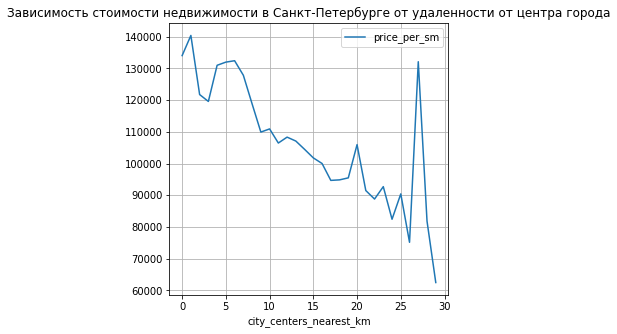

In [58]:
data.query('locality_name == "Санкт-Петербург" and city_сenters_nearest_km != 99999'
          ).pivot_table(index = 'city_сenters_nearest_km', values = 'price_per_sm', aggfunc = 'mean').plot(
    title = 'Зависимость стоимости недвижимости в Санкт-Петербурге от удаленности от центра города', 
                                     grid=True, figsize = (5,5))

**Вывод по пункту 4.4.**

По графику видно, что стоимость недвижимости в Санкт-Петербурге уменьшается при удалении от центра, но на некоторых участках кривой появляются «бугры». Ярко выделяются скачки на расстояннии от центра в 6, 20 и 27 км.

На стоимость недвижимости может влиять не только удалённость от центра, но и, например, расположение культурно-природных объектов, загрязняющих окружающую среду предприятий, элитных посёлков и пр.

Скорее всего, на расстоянии 6 км. от центра в Санкт-Петербурге находится популярный туристический район, а на расстоянии 20 и 27 км. — населённые пункты по типу московской Барвихи.

### Общий вывод

На основе полученных данных можно сделать следующие выводы:
- цена на квартиру увеличивается в зависимости от увеличения:
    - общей площади;
    - жилой площади;
    - площади кухни;
    - количества комнат;
- на цену также влияет:
    - этаж (на первом этаже дешевле, на смежных этажах дороже);
    - расстояние от центра города (чем ближе к центру, тем дороже);
    - день недели размещения объявления (в будние дни цена выше, чем в выходные);
    - месяц размещения объявления (в апреле размещаются объявления с максимальной стоимостью, в июне с минимальной);
    - год размещения объявления (за рассматриваемый период до 2015 цена была максимальной, далее была примерно на одном уровне, с 2019 наблюдался рост, связанный с выходом из четырёхлетнего кризиса).